- cci - Consumer Confidence Index (CCI) - a monthly survey by The Conference Board that measures how optimistic or pessimistic consumers are regarding financial situations, both current and expected. Administered via survery. Leading indicator reflecting U.S. economic conditions, major purchases, consumer view of economy, business conditions, and labor market currently and over the next six months. Two parts of this index is the current expectations and future expectations </br>
    -1985=100 </br>
            -- cci > 100: consumers are optimistic = more spending</br>
            -- cci < 100: consumers are optimistic = less spending</br>
            -- cci < 100: consumers are optimistic = less spending</br>
Released on the last Tuesday of every month.

- cci_cur - CCI Current Expectations component

- cci_exp - CCI Future Expectations component

- umsent - Michigan Consumer Sentiment Index (MCSI) -- a monthly report of consumer confidence levels in the U.S. conducted by the UMICH. Survey results collected via telephone interviews. Also a lead indicator. Differs from CCI in that CCI places more weight on employment and labor market while MCSI focuses primarily on households and future expectations is at 12 months instead of 6 months.</br>
        - same index number scale</br>
Released on the second Friday of each month.        

- umsent_cur - MCSI Current Expectations component

- umsent_exp - MCSI Future Expectations component

- ism_man - ISM Manufacturing Index or Manufacturing Purchasing Managers' Index (PMI) -- reflects the demand level of goods  by the amount of ordering activity from factories. Index of new orders, production, employment, supplier deliveries, and inventories. </br>
        -- Manufacturing PMI > 50 = expanding manufacturing segment compared to last month</br>
        -- Manufacturing PMI < 50 = contracting "   "</br>
This is released on the first business day of each month, so can influence CCI and MCSI.

- ism_non - ISM Non-Manufacturing Index or Non-Manufacturing Purchings Managers' Index (PMI) -- surveys purchasing and supply executives, caputring 15 different (service) industries. Indexes business acitivity, new ordres, employment trends, inventories, and prices.</br>
        -- Finance and Insurance, Agriculture, Retail Trade, Ulilities, Educational Services, etcs.</br>
Released on the third business day of the month.

OlS Assumptions:</br>
[1] The regression is linear.</br>
[2] Random observations.</br>
[3] The conditional mean should be zero.</br>
[4] There is no multi-collinearity.</br>
[5] There is homoscedasticity and no autocorrelation.</br>
[6] (Optional) Error terms should be naturally distributed.</br>

In [155]:
# libraries 
import numpy as np
import statsmodels.api as sm
import pandas as pd
import statsmodels.formula.api as smf
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.linear_model import LinearRegression
from statsmodels.stats.diagnostic import het_white
from statsmodels.graphics.api import interaction_plot, abline_plot
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
import statsmodels
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns

Checking data from cleaning before continuing on

In [156]:
# data
df = pd.read_csv('cur-us_owid_covid_monthly.csv')
pd.set_option('display.max_columns', None)
df = df.dropna()
df.shape[0]
#df.head(5)

300

In [192]:
x_columns = [ 'total_cases', 'stringency_index', 'umsent', 'cci_lag1']
y = df['cci']

In [193]:
x = df[x_columns] 
x = sm.add_constant(x)
summary = sm.OLS(y,x).fit(cov_type='HC3')
print(summary.summary())

                            OLS Regression Results                            
Dep. Variable:                    cci   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     1864.
Date:                Sat, 12 Nov 2022   Prob (F-statistic):          6.14e-208
Time:                        20:50:22   Log-Likelihood:                -923.57
No. Observations:                 300   AIC:                             1857.
Df Residuals:                     295   BIC:                             1876.
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -27.2104      3.619  

----------------------------------------------------------------------------------------------------------------

[1] The regression is linear. (Displaying more than one way.)

In [100]:
sy = smf.ols('cci ~ total_cases + stringency_index + VaxFull**2 + cci_lag1:umsent', df)
mo = sy.fit(cov_type='HC3')
print(mo.summary())

                            OLS Regression Results                            
Dep. Variable:                    cci   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     1336.
Date:                Sat, 12 Nov 2022   Prob (F-statistic):          1.44e-187
Time:                        17:34:55   Log-Likelihood:                -951.16
No. Observations:                 300   AIC:                             1912.
Df Residuals:                     295   BIC:                             1931.
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           28.0754      1.059  

("Cook's Criticl Distance is: ", 0.013333333333333334)
Int64Index([435, 501, 505, 507, 508, 535, 538, 637, 638, 639, 641, 644, 647,
            649, 650, 653, 659, 662, 663, 665],
           dtype='int64') /n [0.02305275 0.06080088 0.01794328 0.02211994 0.02240229 0.01361369
 0.01543799 0.05096502 0.84663156 0.57397319 0.11281392 0.11053513
 0.01605484 0.02235358 0.09161816 0.026452   0.02437565 0.04119751
 0.04707446 0.03440936]


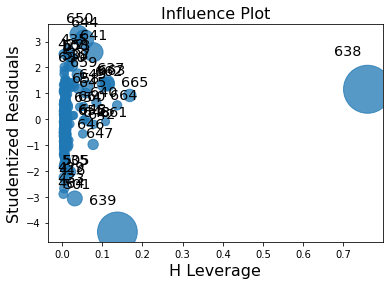

In [181]:
influencers = sm.graphics.influence_plot(mo)

# cooks distance
cooksd = mo.get_influence().cooks_distance[0]

#df to obtain n
n = len(df['cci_lag1'])

# calculate critical d
critical_d = 4/n
print(("Cook's Criticl Distance is: ", critical_d))

# IDs potential outliers w/ leverage
outl_d = cooksd > critical_d
# above 0.5, worth a look at it b/c it may be influential
print(df.index[outl_d],'/n',cooksd[outl_d])

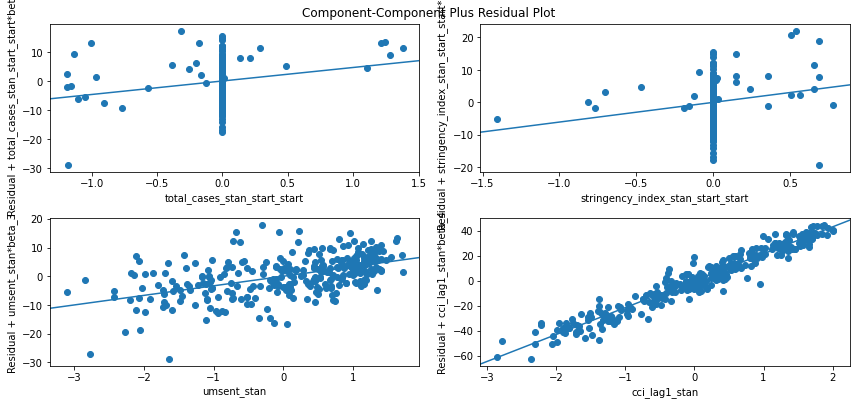

In [182]:
fig =plt.figure(figsize=(12,8))
# CCPR Plot displays outliers and linearity 
fig = sm.graphics.plot_ccpr_grid(mo, fig=fig)

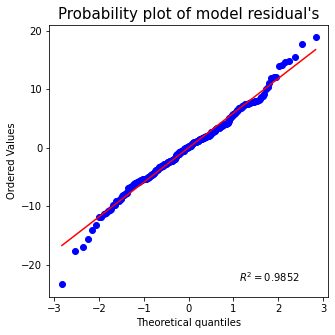

In [183]:
# Checking data quality
fig = plt.figure(figsize= (5, 5))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(mo.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 15)
ax.set

plt.show()

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


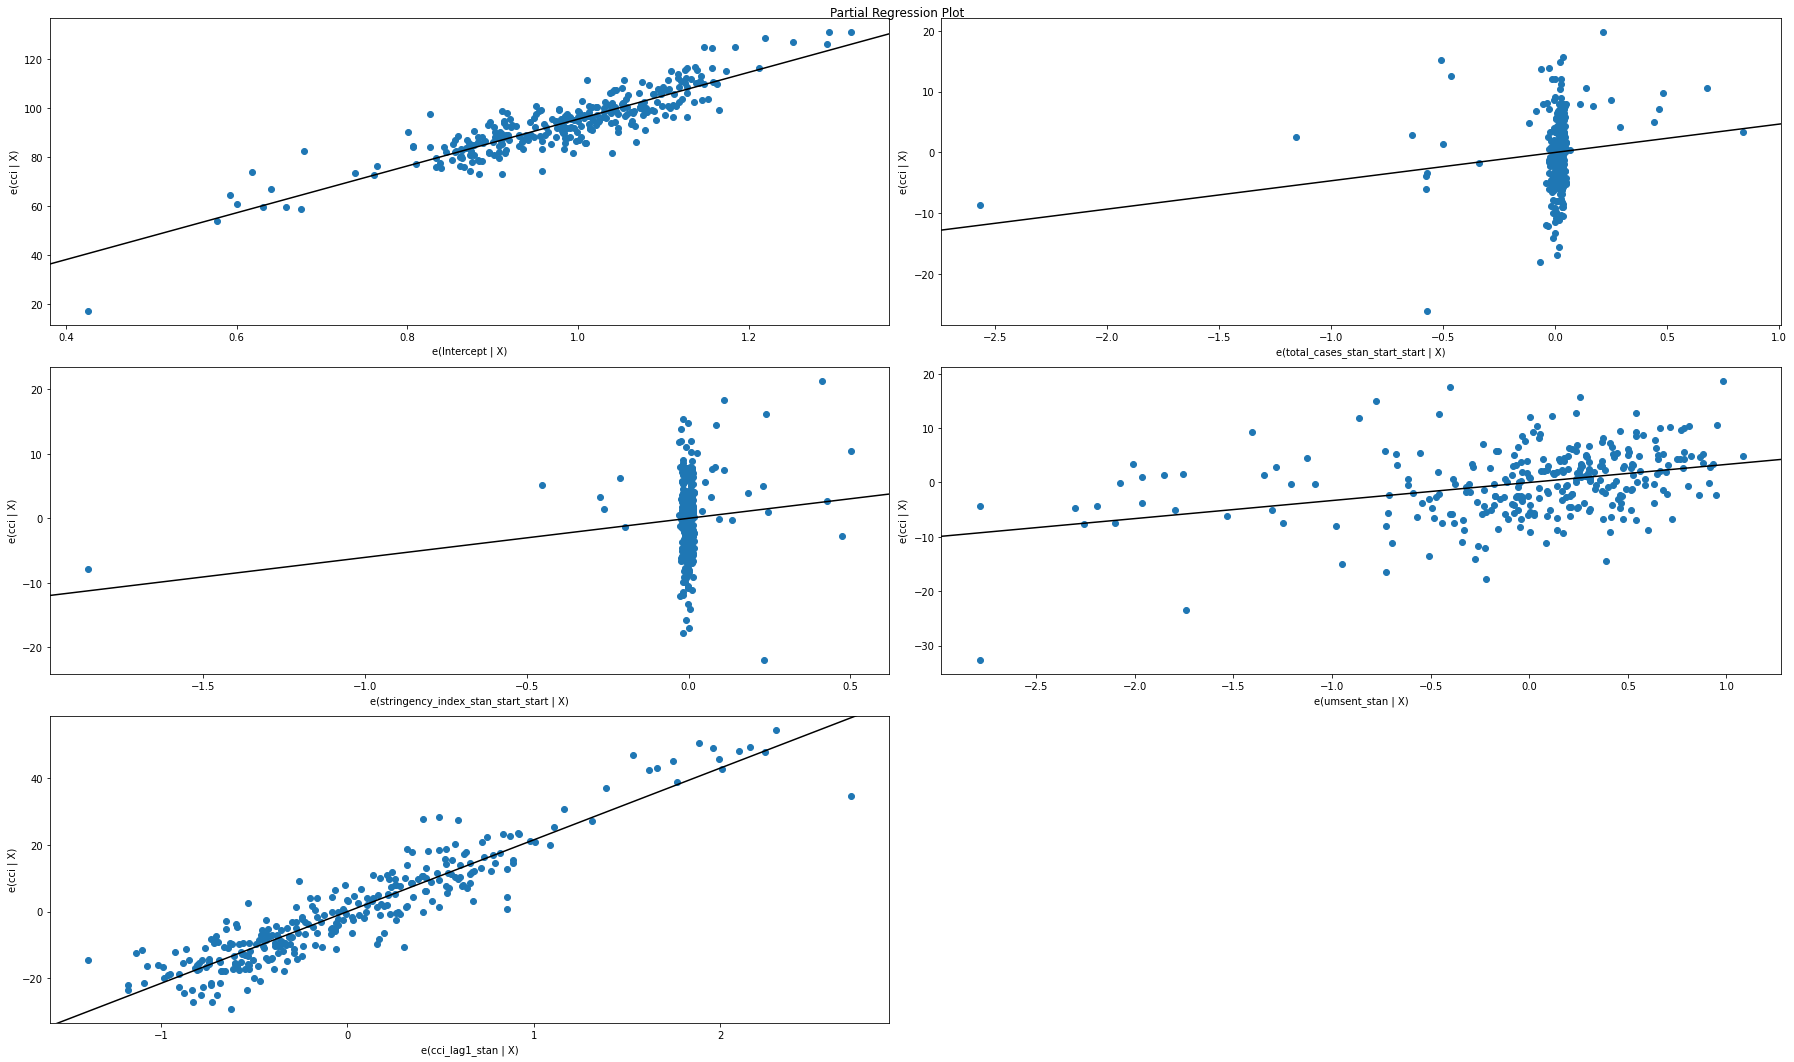

In [184]:
#define figure size
fig = plt.figure(figsize=(25,15))

#produce regression plots
# of y on one predictor variable with different graphs
# fig = sm.graphics.plot_regress_exog(mo, 'cci_lag1', fig=fig)
fig = sm.graphics.plot_partregress_grid(mo, fig=fig)
fig.tight_layout(pad=1.0)

- 'Y and Fitted vs X' and 'Residuals vs fitted' -- checks linear assumptions of linearity, normality, constant variance (violated-hetero, makes cone shape), and independence. </br>
https://analyse-it.com/docs/user-guide/fit-model/linear/residual-plot

- Partial Regression Plot -- checks inluential points and linearity

- CCPR Plot -- checks inluential points, relationship between a regressor and response </br>
by taking into account the other independent variables. The line is if x was highly correlated with any </br>
of the other independent variables.

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

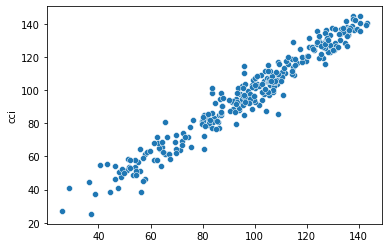

In [185]:
# scatterplot via seaborn and not matplot
mo.fittedvalues
Y_max = y.max()
Y_min = x.min()

ax = sns.scatterplot(x=mo.fittedvalues, y=y)
ax.set(ylim=(Y_min, Y_max))
ax.set(xlim=(Y_min, Y_max))
ax.set_xlabel("Predicted value of CCI")
ax.set_ylabel("Observed value of CCI")

X_ref = Y_ref = np.linspace(Y_min, Y_max, 100)
plt.plot(X_ref, Y_ref, color='red', linewidth=1)
plt.show()

If linearity is not satisfied:
- https://www.quality-control-plan.com/StatGuide/linreg_ass_viol.htm

---------------------------------------------------------------------------------------------------------------

[3] The conditional mean should be zero.</br>

In [187]:
# The really small zero is from approximation, we can assume that the expecter resid mean is 0.
mo.resid.mean()

3.386920373789811e-14

Possible reasons if not satisfied:
- Omitted Variables
- Measurement Errors
- Non-Linearities or unpredicted effects

---------------------------------------------------------------------------------------------------------------

[4] There is no multi-collinearity.

In [190]:
# VIF - measuring strength of correlation with between the predictors, checking for multicollinearity
# between pedictors, If no features are correlated, than all values would be 1. 
# Rule of thumb for removal, VIF larger than 5, or 10.
x_columns = df[[ 'total_cases_stan_start_start', 'stringency_index_stan_start_start', 'umsent_stan', 'cci_lag1_stan']]
x = sm.add_constant(x_columns)
y = df['cci']

In [191]:
dxf2 = pd.DataFrame()

dxf2['feature'] = x_columns.columns

dxf2['VIF'] = [variance_inflation_factor(x_columns.values, i) 
              for i in range(x_columns.shape[1])]


print(dxf2)

                             feature       VIF
0       total_cases_stan_start_start  1.672482
1  stringency_index_stan_start_start  1.654571
2                        umsent_stan  2.603876
3                      cci_lag1_stan  2.584542


---------------------------------------------------------------------------------------------------------------

[5] There is homoscedasticity (equal variance) and no autocorrelation.</br>

In [194]:
# Breusch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']
 
# test result
test_result = sms.het_breuschpagan(mo.resid, mo.model.exog)
 
lzip(names, test_result)
# Looking for p-values at or below significance level

[('Lagrange multiplier statistic', 44.67248562293822),
 ('p-value', 4.65076007395075e-09),
 ('f-value', 12.90341083188673),
 ('f p-value', 1.0778554035942553e-09)]

In [195]:
# Durbin Watson - is < 1, maybe concern. small values of d indicate successive error terms
# are positively correlated. Tests or no lag one, correlation. d > 2, err terms are negatively corrarelated.
# around 2 is symmetric.
sm.stats.durbin_watson(mo.resid)

1.962599454168412

---------------------------------------------------------------------------------------------------------------

[6] (Optional) Error terms should be naturally distributed.</br>

Jarque-Bera statistics. p=value > 0.05 reflects normal distribution.

In [196]:
# Checking for Stationarity, making sure that the mean, variance, and autocorrelation structure
# doesn't change over time

df_stationarityTest = adfuller(df['cci'], autolag='AIC')
print('p-value: ', df_stationarityTest[1])

p-value:  0.27891037351945935


Text(0.5, 1.0, 'cci ~ total_cases_stan_start_start + stringency_index_stan_start_start + umsent_stan + cci_lag1_stan - Residuals Q-Q Plot')

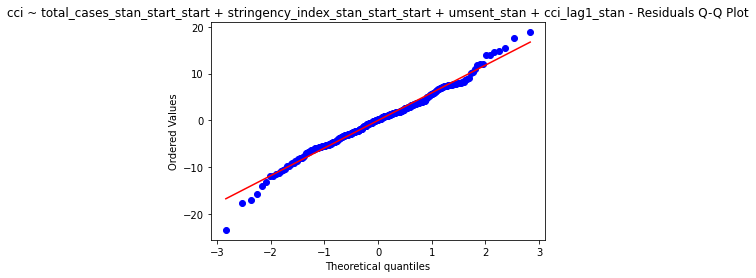

In [197]:
# checking the assumption of normality(normal distribution--homoskedasticity
#      data skew and model fit
from scipy import stats

stats.probplot(mo.resid, dist="norm", plot= plt)
plt.title("cci ~ total_cases_stan_start_start + stringency_index_stan_start_start + umsent_stan + cci_lag1_stan - Residuals Q-Q Plot")

#Saving plot as a png
#plt.savefig("Model1_Resid_qqplot.png")

Text(0.5, 1.0, 'cci ~ total_cases + cci_lag1 + ism-man - Residuals Q-Q Plot')

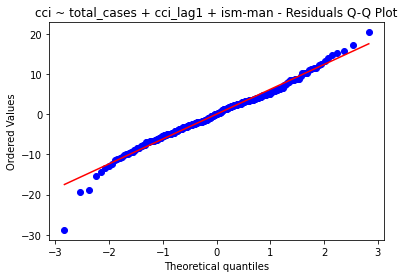

In [144]:
from scipy import stats

stats.probplot(summary1.resid, dist="norm", plot= plt)
plt.title("cci ~ total_cases + cci_lag1 + ism-man - Residuals Q-Q Plot")

#Saving plot as a png
#plt.savefig("Model1_Resid_qqplot.png")

In [211]:
table = sm.stats.anova_lm(mo, typ=1)
print(table)

                                      df         sum_sq        mean_sq  \
total_cases_stan_start_start         1.0      27.239033      27.239033   
stringency_index_stan_start_start    1.0     662.501546     662.501546   
umsent_stan                          1.0  149317.388488  149317.388488   
cci_lag1_stan                        1.0   67854.878004   67854.878004   
Residual                           295.0   10465.353296      35.475774   

                                             F         PR(>F)  
total_cases_stan_start_start          0.767821   3.816050e-01  
stringency_index_stan_start_start    18.674760   2.121515e-05  
umsent_stan                        4208.995947  1.186621e-176  
cci_lag1_stan                      1912.710297  5.819321e-131  
Residual                                   NaN            NaN  


In [212]:
pg = df.corr()
# pg = pg.to_csv('resid_q-q_plot.csv', encoding='utf-8')
pg

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,positive_rate,stringency_index,cci,cci_cur,cci_exp,umsent,umsent_cur,umsent_exp,ism_man,ism_non,cci_lag1,cci_lag2,cci_lag3,cci_lag4,cci_lag5,cci_lag6,cci_lag7,cci_lag8,total_cases_lag1,total_cases_lag2,total_deaths_lag1,total_deaths_lag2,VaxFull,umsent_stan,umsent_mean,total_cases_stan_start_one,total_cases_stan_start_start,total_cases_mean_start_one,total_cases_mean_start_start,total_deaths_stan_start_one,total_deaths_stan_start_start,VaxFull_stan_start_one,VaxFull_stan_start_start,VaxFull_mean_start_one,VaxFull_mean_start_start,cci_stan,cci_mean,stringency_index_stan_start_one,stringency_index_stan_start_start,stringency_index_mean_start_one,stringency_index_mean_start_start,cci_lag1_stan,cci_lag1_mean
total_cases,1.000000,0.731918,0.675118,0.983190,0.646423,0.633434,0.595817,0.094413,0.152775,-0.035227,-0.329655,-0.387146,-0.269706,0.253471,0.280734,0.098416,0.100656,0.099427,0.098822,0.099753,0.098045,0.094816,0.093872,0.995610,0.987893,0.985699,0.986382,0.955868,-0.387146,-0.387146,1.000000,0.466503,1.000000,0.466503,0.983161,0.479157,0.955868,0.236191,0.955868,0.236191,0.094413,0.094413,0.595817,-0.263719,0.595817,-0.263719,0.098416,0.098416
new_cases,0.731918,1.000000,0.916267,0.760064,0.857942,0.829708,0.700117,0.045618,0.074558,-0.018546,-0.279644,-0.328161,-0.228921,0.244688,0.237940,0.060226,0.080145,0.084317,0.081383,0.089600,0.103990,0.098536,0.085311,0.678265,0.667050,0.742266,0.736626,0.679553,-0.328161,-0.328161,0.731918,0.101816,0.731918,0.101816,0.760017,0.113030,0.679553,-0.105311,0.679553,-0.105311,0.045618,0.045618,0.700117,0.125908,0.700117,0.125908,0.060226,0.060226
new_cases_smoothed,0.675118,0.916267,1.000000,0.698959,0.748111,0.856726,0.629771,0.045807,0.070557,-0.010404,-0.248900,-0.292073,-0.203722,0.229843,0.208248,0.059576,0.072448,0.073124,0.070697,0.077625,0.093451,0.098789,0.087233,0.613095,0.597711,0.680348,0.673357,0.629569,-0.292073,-0.292073,0.675118,0.117125,0.675118,0.117125,0.698918,0.130460,0.629569,-0.076512,0.629569,-0.076512,0.045807,0.045807,0.629771,0.116354,0.629771,0.116354,0.059576,0.059576
total_deaths,0.983190,0.760064,0.698959,1.000000,0.698337,0.679986,0.699750,0.104197,0.151590,-0.006539,-0.326883,-0.390106,-0.262853,0.289170,0.325448,0.104871,0.104026,0.102212,0.102017,0.103211,0.101201,0.097130,0.095120,0.977683,0.969486,0.998647,0.995180,0.960758,-0.390106,-0.390106,0.983190,0.343265,0.983190,0.343265,0.999960,0.381172,0.960758,0.154874,0.960758,0.154874,0.104197,0.104197,0.699750,-0.148649,0.699750,-0.148649,0.104871,0.104871
new_deaths,0.646423,0.857942,0.748111,0.698337,1.000000,0.780809,0.842179,0.041404,0.042262,0.031403,-0.262999,-0.316011,-0.210001,0.223233,0.200169,0.048653,0.082889,0.102229,0.099910,0.103438,0.117969,0.115996,0.111030,0.597031,0.559952,0.668050,0.648733,0.584316,-0.316011,-0.316011,0.646423,-0.125846,0.646423,-0.125846,0.698270,-0.130762,0.584316,-0.237148,0.584316,-0.237148,0.041404,0.041404,0.842179,0.353145,0.842179,0.353145,0.048653,0.048653
positive_rate,0.633434,0.829708,0.856726,0.679986,0.780809,1.000000,0.815777,0.029913,0.036349,0.011809,-0.293179,-0.347612,-0.237528,0.150051,0.120814,0.066128,0.098298,0.105567,0.110448,0.123641,0.136888,0.139058,0.135428,0.592931,0.585901,0.660024,0.651238,0.589924,-0.347612,-0.347612,0.633434,-0.136274,0.633434,-0.136274,0.679918,-0.152498,0.589924,-0.074681,0.589924,-0.074681,0.029913,0.029913,0.815777,0.285992,0.815777,0.285992,0.066128,0.066128
stringency_index,0.595817,0.700117,0.629771,0.699750,0.842179,0.815777,1.000000,0.058560,0.041374,0.079636,-0.264573,-0.327748,-0.204056,0.241556,0.233188,0.064402,0.078727,0.092404,0.102061,0.110610,0.119004,0.125382,0.136285,0.571304,0.549348,0.672832,0.647972,0.554323,-0.327748,-0.327748,0.595817,-0.372268,0.595817,-0.372268,0.699661,-0.352017,0.554323,-0.270144,0.554323,-0.270144,0.058560,0.058560,1.000000,0.475828,1.000000,0.475828,0.064402,0.064402
cci,0.094413,0.045618,0.045807,0.10419

test for heteroskedasticity

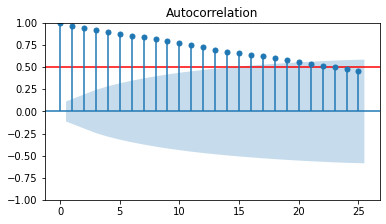

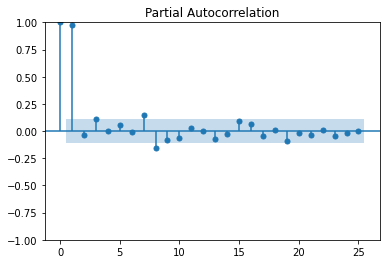

In [42]:
# can determine order of AR model 

fig, ax = plt.subplots(figsize=(6,3.25))
# if > 0.5 or < -0.5 = high correlation
plt.axhline(y=0.5, color='red')
plot_acf(df['cci'], lags=25, ax=ax)
pacf = plot_pacf(df['cci'], lags=25)

In [16]:
# Testing lags to  R-squared, p-value
x_columnsar = [ 'cci_lag1', 'cci_lag7', 'cci_lag8']
yar = df['cci']
xar = df[x_columnsar] 
xar = sm.add_constant(xar)
summaryar = sm.OLS(yar,xar).fit()
print(summaryar.summary2())
# look at pacf plot and 

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.947    
Dependent Variable: cci              AIC:                1962.8065
Date:               2022-11-10 17:42 BIC:                1977.6216
No. Observations:   300              Log-Likelihood:     -977.40  
Df Model:           3                F-statistic:        1799.    
Df Residuals:       296              Prob (F-statistic): 1.23e-189
R-squared:          0.948            Scale:              40.108   
--------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
--------------------------------------------------------------------
const        2.2986     1.3914    1.6520   0.0996   -0.4397   5.0369
cci_lag1     0.9315     0.0269   34.5861   0.0000    0.8785   0.9845
cci_lag7     0.1395     0.0600    2.3259   0.0207    0.0215   0.2575
cci_lag8    -0.0957     0.0577   -1.6578   0.0984   -0.2092   0.0179

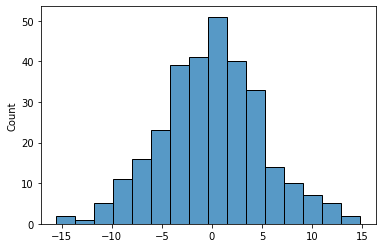

In [73]:
import seaborn as sns
sns.histplot(mo.resid);

In [74]:
mu, std = stats.norm.fit(mo.resid)
mu, std

(3.51837077990543e-14, 5.114392700741859)

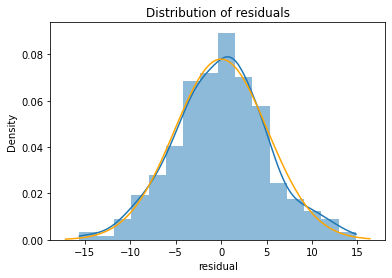

In [75]:
fig, ax = plt.subplots()
# plot the residuals
sns.histplot(x=mo.resid, ax=ax, stat="density", linewidth=0, kde=True)
ax.set(title="Distribution of residuals", xlabel="residual")

# plot corresponding normal curve
xmin, xmax = plt.xlim() # the maximum x values from the histogram above
x = np.linspace(xmin, xmax, 100) # generate some x values
p = stats.norm.pdf(x, mu, std) # calculate the y values for the normal curve
sns.lineplot(x=x, y=p, color="orange", ax=ax)
plt.show()

Extras:

In [122]:
# correlation of model 
round(x.corr(),3)

,const,total_cases,cci_lag5,umsent
const,NaN,NaN,NaN,NaN
total_cases,NaN,1.00,0.100,-0.330
cci_lag5,NaN,0.10,1.000,0.677
umsent,NaN,-0.33,0.677,1.000


----------------------------------------------------------------------------------------------------------------------------------------------------------------

Centering means and trying to fix multicollinearity

In [112]:
df.head(0)

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,positive_rate,stringency_index,cci,cci_cur,cci_exp,umsent,umsent_cur,umsent_exp,ism_man,ism_non,cci_lag1,cci_lag2,cci_lag3,cci_lag4,cci_lag5,cci_lag6,cci_lag7,cci_lag8,total_cases_lag1,total_cases_lag2,total_deaths_lag1,total_deaths_lag2,VaxFull,umsent_stan,umsent_mean-diff,total_cases_stan-start-one,total_cases_stan-start-start,total_cases_mean-start-one,total_cases_mean-start-start,total_deaths_stan-start-one,total_deaths_stan-start-start,VaxFull_stan-start-one,VaxFull_stan-start-start,VaxFull_mean-start-one,VaxFull_mean-start-start,cci_stan,cci_mean,stringency_index_stan-start-one,stringency_index_stan-start-start,stringency_index_mean-start-one,stringency_index_mean-start-start


In [188]:
### Original
#  x_columns = [ 'total_cases', 'stringency_index', 'umsent', 'VaxFull', 'cci_lag1']
#  y = df['cci']

x_columns = [ 'total_cases_stan_start_start', 'stringency_index_stan_start_start', 'umsent_stan', 'cci_lag1_stan']
y = df['cci']
x = df[x_columns] 
x = sm.add_constant(x)
summary = sm.OLS(y,x).fit()#cov_type='HC3')
print(summary.summary())

                            OLS Regression Results                            
Dep. Variable:                    cci   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1535.
Date:                Sat, 12 Nov 2022   Prob (F-statistic):          4.76e-196
Time:                        20:49:06   Log-Likelihood:                -958.49
No. Observations:                 300   AIC:                             1927.
Df Residuals:                     295   BIC:                             1945.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [179]:
sy = smf.ols('cci ~ total_cases_stan_start_start + stringency_index_stan_start_start + umsent_stan + cci_lag1_stan', df)
mo = sy.fit()
print(mo.summary())

                            OLS Regression Results                            
Dep. Variable:                    cci   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1535.
Date:                Sat, 12 Nov 2022   Prob (F-statistic):          4.76e-196
Time:                        20:45:23   Log-Likelihood:                -958.49
No. Observations:                 300   AIC:                             1927.
Df Residuals:                     295   BIC:                             1945.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [166]:
sy2 = smf.ols('cci ~ total_cases_mean_start_start + stringency_index_mean_start_start + umsent_mean + cci_lag1_mean', df)
mo2 = sy2.fit()
print(mo2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cci   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1535.
Date:                Sat, 12 Nov 2022   Prob (F-statistic):          4.76e-196
Time:                        20:35:01   Log-Likelihood:                -958.49
No. Observations:                 300   AIC:                             1927.
Df Residuals:                     295   BIC:                             1945.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc